# Practica sobre variable aleatoria

## Objetivos:
1. Evaluar diferentes condiciones necesarias y suficientes para el cumplimiento del Teorema del Límite Central.
2. Evaluar el concepto de ergocicidad en un proceso aleatorio. Para el caso específico del Movimiento Browniano.
3. Aplicar los conceptos de pruebas de hipótesis y normalidad para comparar grupos de datos.

# Punto 1: Teorema del límite central



Desarrollo:

La media ($\mu$) y la desviación estándar ($\sigma$) de una Variable Aleatoria (VA) Uniforme ~ [a,b] está dada por la expresión: $\mu = \frac{a+b}{2}$ y $\sigma^2 = \frac{1}{12}(b-a)^2$.


1.1. Considere la suma de $n$ distribuciones con $n \in \{2,5,100,1000\}$ y grafique el histograma resultante para cada caso.

1.2. ¿Cuál es la distribución resultante del punto 1? Estime la media y la desviación estándar del resultado de la suma.
Compare con el caso teórico del punto anterior.

1.3. Considere ahora una VA exponencial, cuya distribución es: $F(\lambda)=\lambda e^{-\lambda x}$, con $\lambda=5$.
Realice el mismo procedimiento que realizó con las VA Uniformes y obtenga la media y desviación estandar, teniendo en cuenta que: $\mu = \sigma = \frac{1}{λ}$. Describa el comportamiento que se observa al realizar la suma de las $n$ distribuciones exponenciales.

1.4. Realice lo indicado en el ítem 1.2 para este caso con exponenciales.
Compare el resultado con VAs uniformes vs. VA exponenciales y concluya.


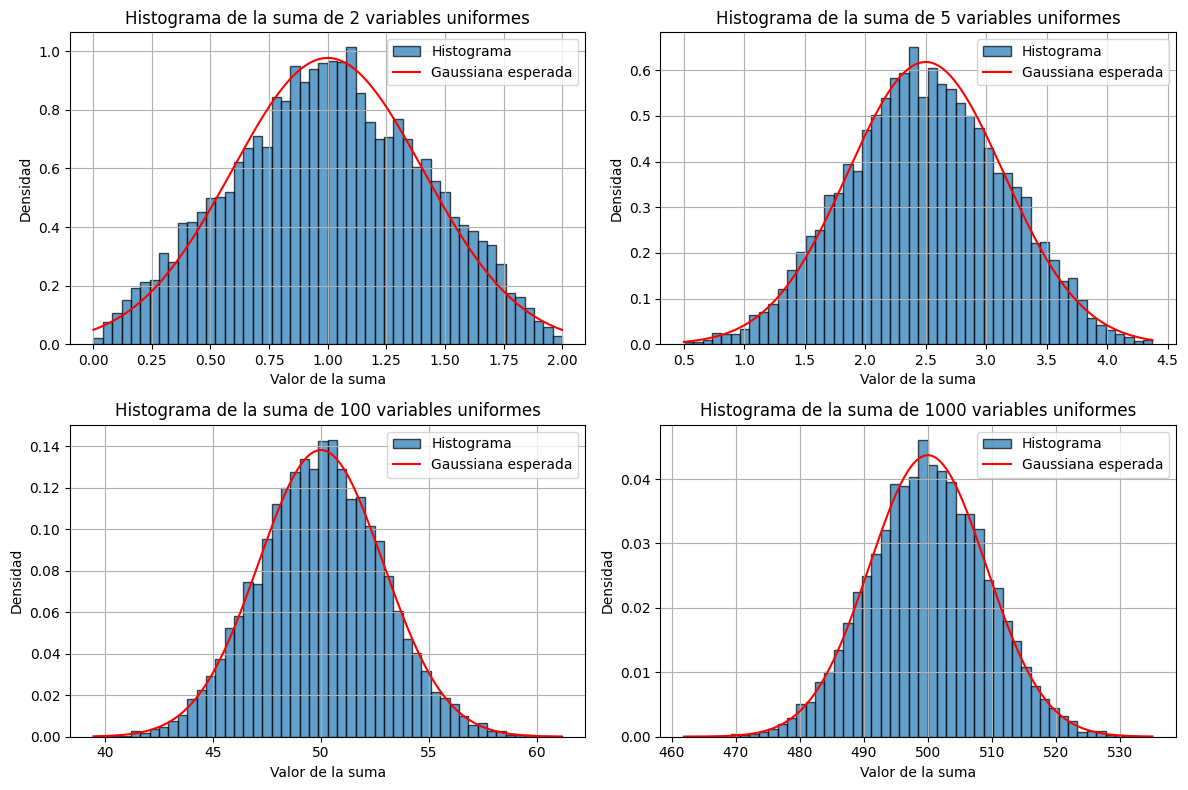

n = 2
Media simulada = 0.9942, Media teórica = 1.0000
Desviación simulada = 0.4102, Desviación teórica = 0.4082
--------------------------------------------------
n = 5
Media simulada = 2.5004, Media teórica = 2.5000
Desviación simulada = 0.6508, Desviación teórica = 0.6455
--------------------------------------------------
n = 100
Media simulada = 50.0532, Media teórica = 50.0000
Desviación simulada = 2.8430, Desviación teórica = 2.8868
--------------------------------------------------
n = 1000
Media simulada = 500.0535, Media teórica = 500.0000
Desviación simulada = 9.0159, Desviación teórica = 9.1287
--------------------------------------------------


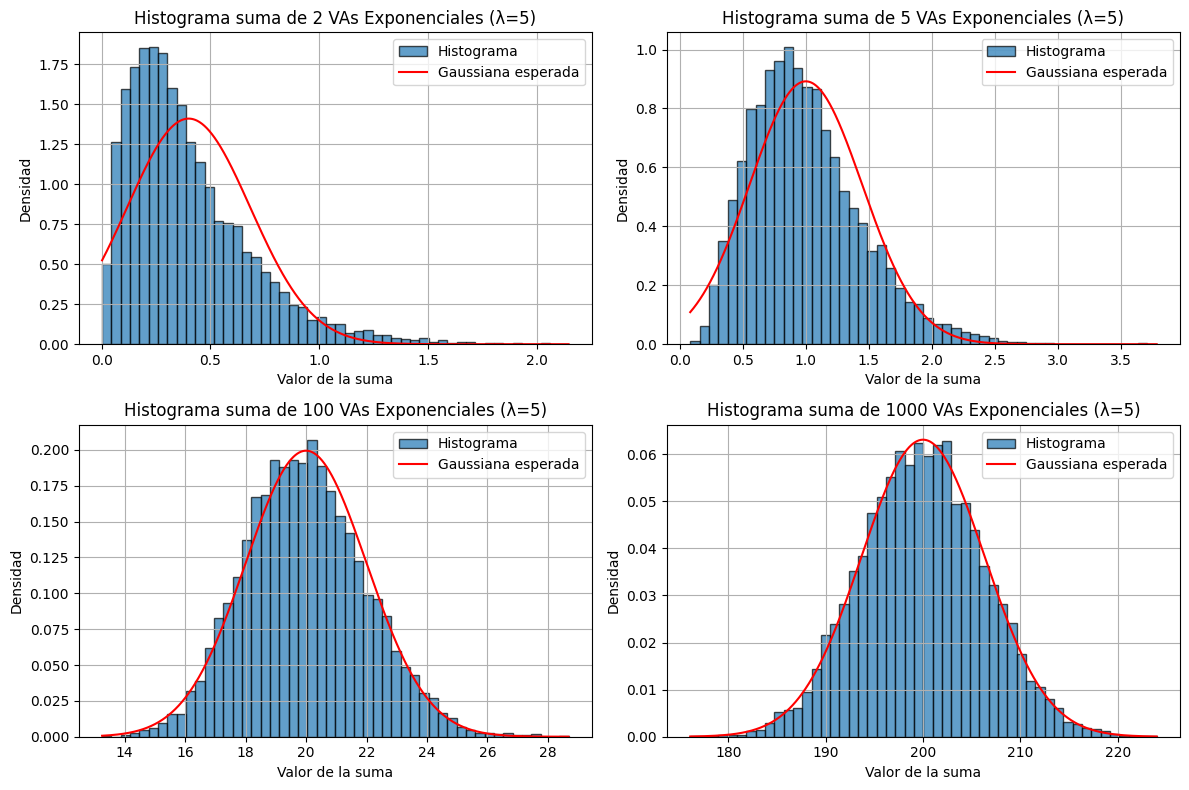

n = 2
Media simulada = 0.4051, Media teórica = 0.4000
Desviación simulada = 0.2864, Desviación teórica = 0.2828
--------------------------------------------------
n = 5
Media simulada = 0.9998, Media teórica = 1.0000
Desviación simulada = 0.4449, Desviación teórica = 0.4472
--------------------------------------------------
n = 100
Media simulada = 20.0072, Media teórica = 20.0000
Desviación simulada = 1.9988, Desviación teórica = 2.0000
--------------------------------------------------
n = 1000
Media simulada = 200.0089, Media teórica = 200.0000
Desviación simulada = 6.4130, Desviación teórica = 6.3246
--------------------------------------------------


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.stats import pearsonr
def ejercicio1_1(samples, n_values, a, b):
    mu_uniforme = (a + b) / 2
    var_uniforme = (b - a) ** 2 / 12

    # Crear una figura
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    for i, n in enumerate(n_values):
        # Generamos samples x n variables uniformes
        uniforms = np.random.uniform(a, b, (samples, n))
        
        # Sumamos a lo largo del eje de las columnas
        sums = np.sum(uniforms, axis=1)
        
        # Graficar en el subplot correspondiente
        ax = axes[i // 2, i % 2]
        ax.hist(sums, bins=50, density=True, alpha=0.7, edgecolor='black', label="Histograma")
        
        # Comparación con la gaussiana esperada
        media_teorica = n * mu_uniforme
        desviacion_teorica = np.sqrt(n * var_uniforme)
        x = np.linspace(min(sums), max(sums), 1000)
        y = norm.pdf(x, loc=media_teorica, scale=desviacion_teorica)
        ax.plot(x, y, color='red', label="Gaussiana esperada")

        ax.set_title(f"Histograma de la suma de {n} variables uniformes")
        ax.set_xlabel("Valor de la suma")
        ax.set_ylabel("Densidad")
        ax.legend()
        ax.grid(True)

    # Ajustar el espacio entre subplots
    plt.tight_layout()
    plt.show()
def ejercicio1_2(samples, n_values, a, b):
    mu_uniforme = (a + b) / 2
    var_uniforme = (b - a) ** 2 / 12

    for n in n_values:
        # Simulación
        uniforms = np.random.uniform(a, b, (samples, n))
        sums = np.sum(uniforms, axis=1)
        
        # Estadísticos muestrales
        media_muestral = np.mean(sums)
        desviacion_muestral = np.std(sums)
        
        # Teóricos
        media_teorica = n * mu_uniforme
        desviacion_teorica = np.sqrt(n * var_uniforme)
        
        # Resultados
        print(f"n = {n}")
        print(f"Media simulada = {media_muestral:.4f}, Media teórica = {media_teorica:.4f}")
        print(f"Desviación simulada = {desviacion_muestral:.4f}, Desviación teórica = {desviacion_teorica:.4f}")
        print("-" * 50)

def ejercicio1_3(lambda_param, samples, n_values):
    mu = 1 / lambda_param
    sigma = 1 / lambda_param

    # Crear una figura
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    for i, n in enumerate(n_values):
        # Simulación
        exponenciales = np.random.exponential(scale=mu, size=(samples, n))
        sums = np.sum(exponenciales, axis=1)

        # Gráfica en el subplot correspondiente
        ax = axes[i // 2, i % 2]
        ax.hist(sums, bins=50, density=True, alpha=0.7, edgecolor='black', label="Histograma")

        # Comparación con la gaussiana esperada
        media_teorica = n * mu
        desviacion_teorica = np.sqrt(n) * sigma
        x = np.linspace(min(sums), max(sums), 1000)
        y = norm.pdf(x, loc=media_teorica, scale=desviacion_teorica)
        ax.plot(x, y, color='red', label="Gaussiana esperada")

        ax.set_title(f"Histograma suma de {n} VAs Exponenciales (λ={lambda_param})")
        ax.set_xlabel("Valor de la suma")
        ax.set_ylabel("Densidad")
        ax.legend()
        ax.grid(True)

    # Ajustar el espacio entre subplots
    plt.tight_layout()
    plt.show()


def ejercicio1_4(lambda_param, samples, n_values):

    mu = 1 / lambda_param
    sigma = 1 / lambda_param
    for n in n_values:
        # Simulación
        exponenciales = np.random.exponential(scale=mu, size=(samples, n))
        sums = np.sum(exponenciales, axis=1)

        # Estadísticos muestrales
        media_muestral = np.mean(sums)
        desviacion_muestral = np.std(sums)

        # Cálculos teóricos
        media_teorica = n * mu
        desviacion_teorica = np.sqrt(n) * sigma

        # Resultados
        print(f"n = {n}")
        print(f"Media simulada = {media_muestral:.4f}, Media teórica = {media_teorica:.4f}")
        print(f"Desviación simulada = {desviacion_muestral:.4f}, Desviación teórica = {desviacion_teorica:.4f}")
        print("-" * 50)
# Llamar a la función con los parámetros deseados
a = 0
b = 1
samples = 10000
n_values = [2, 5, 100, 1000]
lambda_param=5
ejercicio1_1(samples, n_values, a, b)
ejercicio1_2(samples, n_values, a, b)
ejercicio1_3(lambda_param, samples, n_values)
ejercicio1_4(lambda_param, samples, n_values)




## Punto 2: Suma de VAs con diferentes distribuciones

2.1. Considere 120 distribuciones uniformes, en grupos de 20 con diferentes valores de a y b por grupo. Muestre que la suma total converge a una distribución Gaussiana después de 1000 realizaciones.



Grupo 1: a = 4.59, b = 9.25
Grupo 2: a = 7.88, b = 12.08
Grupo 3: a = 12.91, b = 16.50
Grupo 4: a = 15.45, b = 19.51
Grupo 5: a = 23.76, b = 26.37
Grupo 6: a = 29.70, b = 33.82


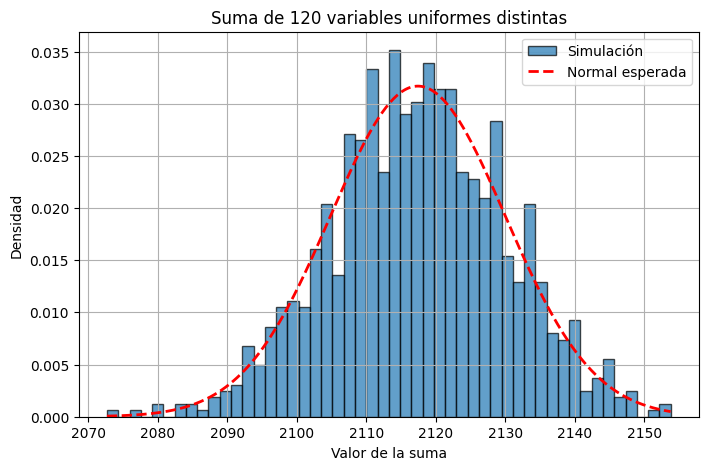

Media de las sumas: 2117.4196
Desviación estándar de las sumas: 12.5901


In [44]:
def ejercicio2_1(samples, grupos, distribuciones_por_grupo):

    total_distribuciones = grupos * distribuciones_por_grupo
    sumas = np.zeros(samples)
    
    # Recorremos los grupos
    for g in range(grupos):
        # Para cada grupo, definimos un rango diferente de a y b
        a = np.random.uniform(0, 5) + g * 5   # Ejemplo: grupos en rangos [0-5], [5-10], [10-15], ...
        b = a + np.random.uniform(2, 5)        # b siempre un poco mayor que a (2 a 5 unidades más)
        
        print(f"Grupo {g+1}: a = {a:.2f}, b = {b:.2f}")
        
        # Generamos distribuciones para este grupo
        uniformes = np.random.uniform(a, b, (samples, distribuciones_por_grupo))
        
        # Sumamos al total
        sumas += np.sum(uniformes, axis=1)
    
    # Histograma
    plt.figure(figsize=(8,5))
    conteo, bins, _ = plt.hist(sumas, bins=50, density=True, edgecolor='black', alpha=0.7, label='Simulación')

    # Curva Normal esperada
    media_teorica = np.mean(sumas)
    desviacion_teorica = np.std(sumas)
    x = np.linspace(min(bins), max(bins), 300)
    y = norm.pdf(x, loc=media_teorica, scale=desviacion_teorica)
    plt.plot(x, y, 'r--', linewidth=2, label='Normal esperada')

    plt.title('Suma de 120 variables uniformes distintas')
    plt.xlabel('Valor de la suma')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Estadísticas
    print(f"Media de las sumas: {media_teorica:.4f}")
    print(f"Desviación estándar de las sumas: {desviacion_teorica:.4f}")

samples=1000
grupos=6
distribuciones_por_grupo=20
ejercicio2_1(samples, grupos, distribuciones_por_grupo)

## Suma de VAs con diferentes distribuciones (Uniforme, Exponencial, Gaussiana)

2.2. Considere ahora 1000 realizaciones de 30 distribuciones, así: 10 Uniformes, 10 Exponenciales, y 10 Gaussianas. Use a=10 y b=20, $\lambda=5$, y $\mu =30$, $\sigma=5$. Muestre que el ensamble converge a una distribución Gaussiana. Calcule la media y la desviación estándar del ensamble resultante. Concluya.

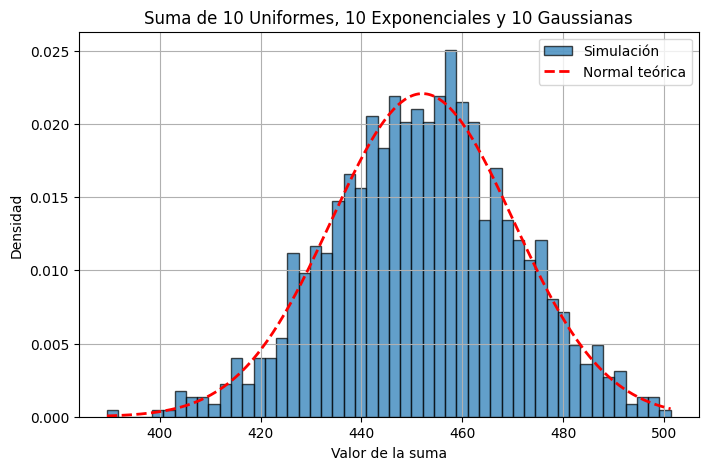

Media del ensamble: 452.1039
Desviación estándar del ensamble: 18.0774


In [27]:

def ejercicio2_2(samples=1000, n_uniformes=10, n_exponenciales=10, n_normales=10, a=10, b=20, lambda_exp=5, mu_norm=30, sigma_norm=5):
    # Inicializar suma
    sumas = np.zeros(samples)

    uniformes = np.random.uniform(a, b, (samples, n_uniformes))
    sumas += np.sum(uniformes, axis=1)
    
    # 10 Exponenciales
    exponenciales = np.random.exponential(scale=1/lambda_exp, size=(samples, n_exponenciales))
    sumas += np.sum(exponenciales, axis=1)
    
    # 10 Gaussianas
    gaussianas = np.random.normal(mu_norm, sigma_norm, (samples, n_normales))
    sumas += np.sum(gaussianas, axis=1)
    
    # Estadísticos
    media = np.mean(sumas)
    desviacion = np.std(sumas)
    
    # Graficar
    plt.figure(figsize=(8,5))
    conteo, bins, _ = plt.hist(sumas, bins=50, density=True, edgecolor='black', alpha=0.7, label='Simulación')

    # Curva Normal teórica ajustada
    x = np.linspace(min(bins), max(bins), 300)
    y = norm.pdf(x, media, desviacion)
    plt.plot(x, y, 'r--', linewidth=2, label='Normal teórica')
    
    plt.title('Suma de 10 Uniformes, 10 Exponenciales y 10 Gaussianas')
    plt.xlabel('Valor de la suma')
    plt.ylabel('Densidad')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Resultados
    print(f"Media del ensamble: {media:.4f}")
    print(f"Desviación estándar del ensamble: {desviacion:.4f}")
ejercicio2_2()

Al sumar 30 variables independientes, aunque de distribuciones distintas (uniforme, exponencial, normal), el resultado converge hacia una distribución normal gracias al Teorema del Límite Central.

Esto ocurre porque el efecto de muchas variables independientes hace que los detalles de las distribuciones originales "desaparezcan", y predominen sólo la media y la varianza en el resultado final.

## Suma de VAs correlacionadas

2.3. Considere los archivos "Vas_exponential_correlated.csv" y "Vas_exponential_uncorrelated.csv". Cada uno corresponde a 1000 realizaciones de 20 distribuciones. Encuentre el ensamble en cada caso, dibuje y compare. Qué puede concluir con la información que ha encontrado hasta ahora?

Calcule ahora, para cada caso, el coeficiente de correlación de Pearson (usando la función "pearsonr") entre cada una de las distribuciones y todas las demás. Deberá encontrar una matriz de [20 X 20], qué puede concluir ahora?

Dimensiones de correlated: (20, 1001)
Dimensiones de uncorrelated: (20, 1001)
--------------------------------------------------


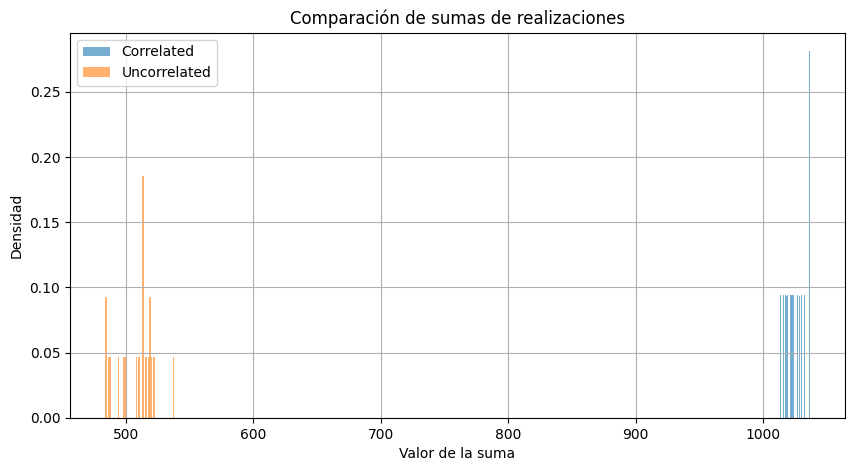

Correlated - Media: 1024.4084, Desviación estándar: 7.4415
Uncorrelated - Media: 508.0442, Desviación estándar: 14.3037
--------------------------------------------------


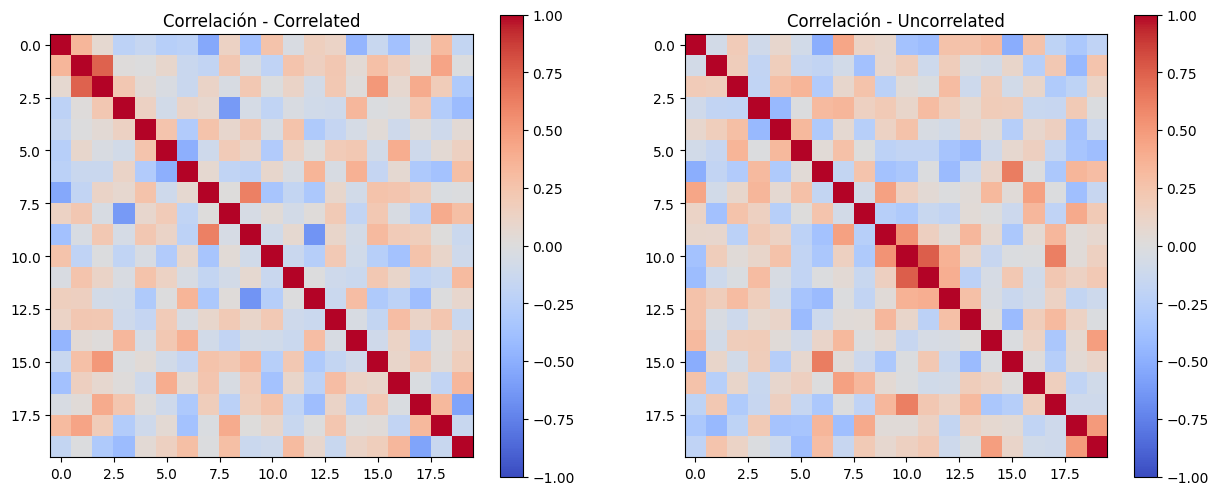

In [30]:
def ejercicio2_3(correlated_path, uncorrelated_path):
    correlated = pd.read_csv(correlated_path)
    uncorrelated = pd.read_csv(uncorrelated_path)
    
    print(f"Dimensiones de correlated: {correlated.shape}")
    print(f"Dimensiones de uncorrelated: {uncorrelated.shape}")
    print("-" * 50)
    
    # Sumar sobre las 20 distribuciones
    correlated_sums = correlated.sum(axis=1)
    uncorrelated_sums = uncorrelated.sum(axis=1)
    
    # Graficar histogramas
    plt.figure(figsize=(10,5))
    plt.hist(correlated_sums, bins=50, density=True, alpha=0.6, label='Correlated')
    plt.hist(uncorrelated_sums, bins=50, density=True, alpha=0.6, label='Uncorrelated')
    plt.title('Comparación de sumas de realizaciones')
    plt.xlabel('Valor de la suma')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Estadísticas
    print(f"Correlated - Media: {np.mean(correlated_sums):.4f}, Desviación estándar: {np.std(correlated_sums):.4f}")
    print(f"Uncorrelated - Media: {np.mean(uncorrelated_sums):.4f}, Desviación estándar: {np.std(uncorrelated_sums):.4f}")
    
    print("-" * 50)
    
    # Matrices de correlación Pearson
    matriz_correlated = np.zeros((20, 20))
    matriz_uncorrelated = np.zeros((20, 20))
    
    for i in range(20):
        for j in range(20):
            matriz_correlated[i,j] = pearsonr(correlated.iloc[:,i], correlated.iloc[:,j])[0]
            matriz_uncorrelated[i,j] = pearsonr(uncorrelated.iloc[:,i], uncorrelated.iloc[:,j])[0]
    
    # Mostrar matrices como imágenes
    fig, axs = plt.subplots(1, 2, figsize=(15,6))

    cax1 = axs[0].imshow(matriz_correlated, cmap='coolwarm', vmin=-1, vmax=1)
    axs[0].set_title('Correlación - Correlated')
    plt.colorbar(cax1, ax=axs[0])

    cax2 = axs[1].imshow(matriz_uncorrelated, cmap='coolwarm', vmin=-1, vmax=1)
    axs[1].set_title('Correlación - Uncorrelated')
    plt.colorbar(cax2, ax=axs[1])

    plt.show()

    return matriz_correlated, matriz_uncorrelated
correlated_file = 'https://raw.githubusercontent.com/jbcgames/Lab_3_senales/main/Vas_exponential_correlated.csv'
uncorrelated_file = 'https://raw.githubusercontent.com/jbcgames/Lab_3_senales/main/Vas_exponential_uncorrelated.csv'
mat_corr, mat_uncorr = ejercicio2_3(correlated_file, uncorrelated_file)

# Punto 3: Procesos aleatorios



## 3.1. Señal cosenoidal con fase aleatoria

3.1 Genere N arreglos del proceso aleatorio $cos(2 \pi f_c t + Φ) + 1$ donde $Φ \thicksim U [0,2\pi]$ y grafique al menos 5 de ellos en una figura.

3.2 Varíe el número de arreglos entre [10, 100, 1000], calcule la media a travez del ensamble para cada tiempo y grafique el resultado. Qué puede concluir del comportamiento de la media del ensamble al variar la cantidad de arreglos generados del proceso aleatorio?

3.3 Calcule la media temporal para cada arreglo y grafique el resultado. Qué puede inferir del proceso aleatorio?



<>:94: SyntaxWarning: invalid escape sequence '\m'
<>:94: SyntaxWarning: invalid escape sequence '\m'
C:\Users\JBCLaptop\AppData\Local\Temp\ipykernel_10956\4049068050.py:94: SyntaxWarning: invalid escape sequence '\m'
  plt.axhline(1, color='red', linestyle='--', label='Valor esperado teórico ($\mu=1$)')


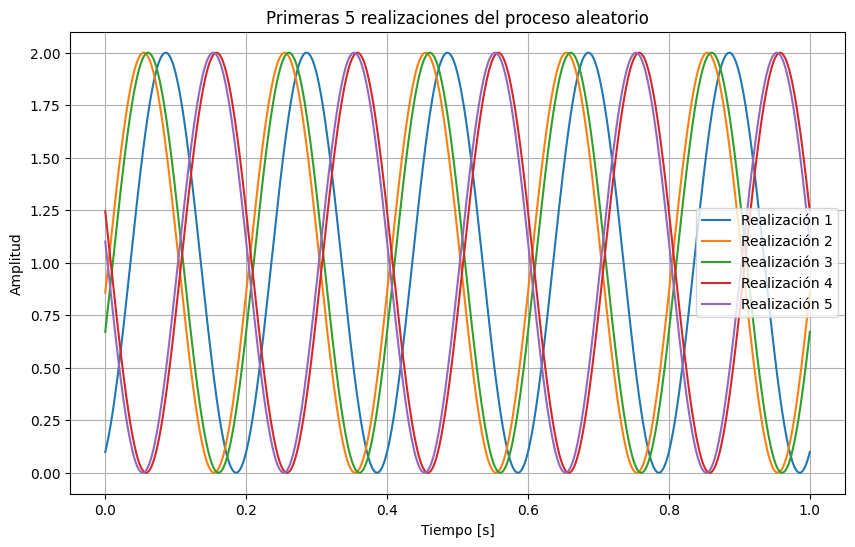

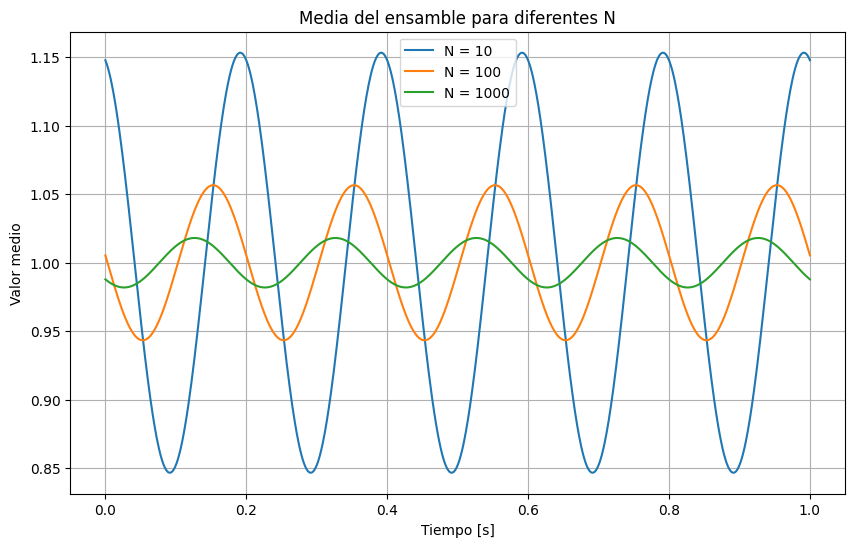

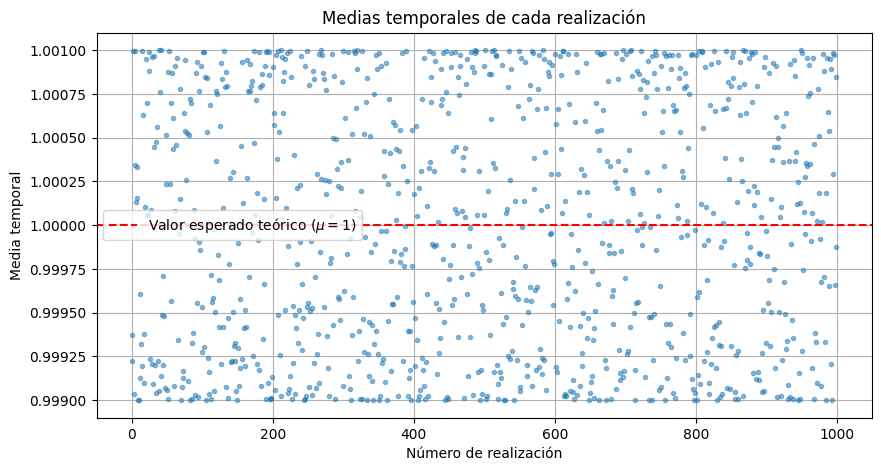

Media promedio de todas las medias temporales: 1.0000
Desviación estándar de las medias temporales: 0.0007


In [38]:

def ejercicio3_1(N=20, fc=5, T=1, fs=1000):
    """
    Genera N realizaciones del proceso aleatorio
    x(t) = cos(2πf_c t + Φ) + 1
    donde Φ ~ Uniforme[0, 2π].
    
    Parámetros:
    - N: número de realizaciones
    - fc: frecuencia en Hz
    - T: duración total en segundos
    - fs: frecuencia de muestreo en Hz
    """
    t = np.linspace(0, T, int(T * fs))  # vector de tiempo
    realizaciones = []
    
    for _ in range(N):
        phi = np.random.uniform(0, 2*np.pi)
        x = np.cos(2*np.pi*fc*t + phi) + 1
        realizaciones.append(x)
    
    # Convertir a arreglo de numpy
    realizaciones = np.array(realizaciones)
    
    # Graficar las primeras 5
    plt.figure(figsize=(10,6))
    for i in range(5):
        plt.plot(t, realizaciones[i], label=f'Realización {i+1}')
    
    plt.title('Primeras 5 realizaciones del proceso aleatorio')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.show()

def ejercicio3_2(N_values=[10, 100, 1000], fc=5, T=1, fs=1000):
    """
    Calcula y grafica la media del ensamble para diferentes cantidades de realizaciones N.
    """
    t = np.linspace(0, T, int(T * fs))  # Vector de tiempo
    medias = {}  # Diccionario para guardar las medias para cada N

    for N in N_values:
        realizaciones = []
        
        for _ in range(N):
            phi = np.random.uniform(0, 2*np.pi)
            x = np.cos(2*np.pi*fc*t + phi) + 1
            realizaciones.append(x)
        
        realizaciones = np.array(realizaciones)
        
        # Media del ensamble en cada instante
        media_ensamble = np.mean(realizaciones, axis=0)
        medias[N] = media_ensamble

    # Graficar todas las medias
    plt.figure(figsize=(10,6))
    for N in N_values:
        plt.plot(t, medias[N], label=f'N = {N}')
    
    plt.title('Media del ensamble para diferentes N')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Valor medio')
    plt.legend()
    plt.grid(True)
    plt.show()

    return
def ejercicio3_3(N=1000, fc=5, T=1, fs=1000):
    """
    Calcula y grafica la media temporal para cada realización.
    
    Parámetros:
    - N: número de realizaciones
    - fc: frecuencia de la señal (Hz)
    - T: duración de cada señal (segundos)
    - fs: frecuencia de muestreo (Hz)
    """
    t = np.linspace(0, T, int(T * fs))  # vector de tiempo
    medias_temporales = []

    for _ in range(N):
        phi = np.random.uniform(0, 2*np.pi)
        x = np.cos(2*np.pi*fc*t + phi) + 1
        media_temporal = np.mean(x)
        medias_temporales.append(media_temporal)
    
    medias_temporales = np.array(medias_temporales)
    
    # Gráfica
    plt.figure(figsize=(10,5))
    plt.plot(medias_temporales, '.', alpha=0.5)
    plt.axhline(1, color='red', linestyle='--', label='Valor esperado teórico ($\mu=1$)')
    plt.title('Medias temporales de cada realización')
    plt.xlabel('Número de realización')
    plt.ylabel('Media temporal')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Mostrar promedio general
    print(f"Media promedio de todas las medias temporales: {np.mean(medias_temporales):.4f}")
    print(f"Desviación estándar de las medias temporales: {np.std(medias_temporales):.4f}")

ejercicio3_1()
ejercicio3_2()
ejercicio3_3()

## Movimiento Browniano

# Punto 4: Procesos aleatorios y ergodicidad, caso del movimiento browniano.

4.1. Considere la función "brownian motion(M,T)" donde M=1000 y T=10. Genere el ensamble del proceso aleatorio, dibújelo y calcule la media del ensamble (para todas las filas del ensamble) y la media temporal (para todas las columnas). Qué puede concluir?




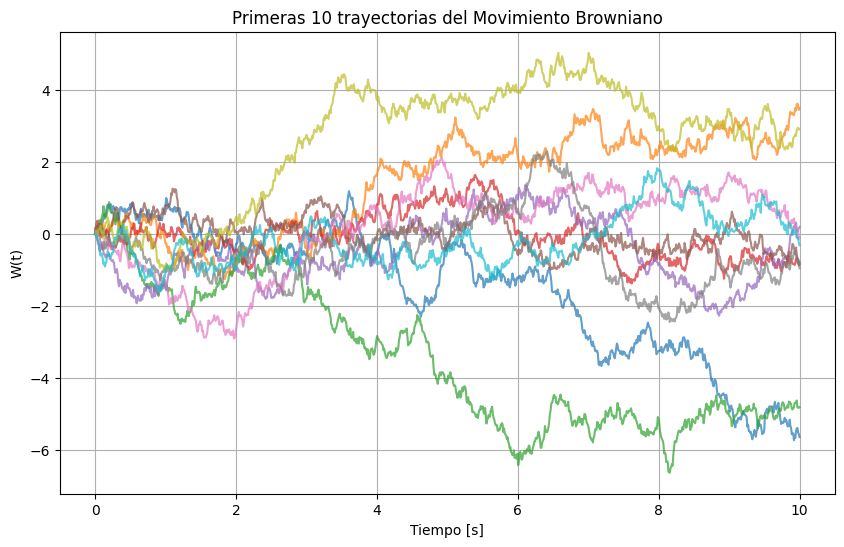

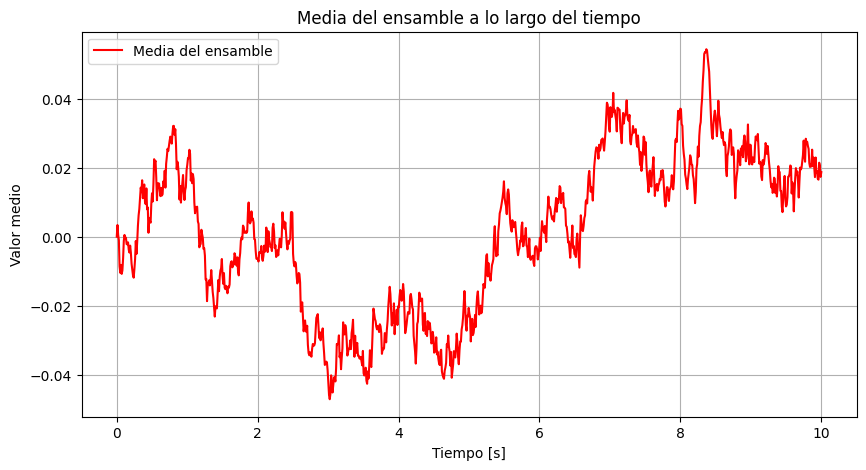

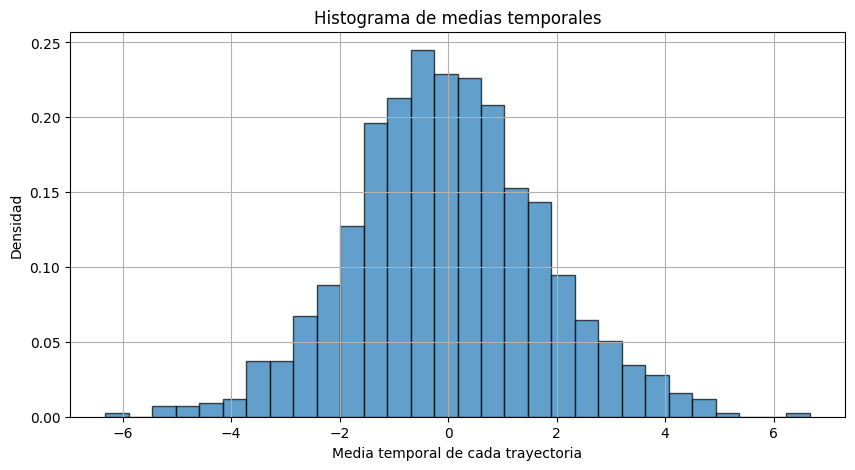

Media general de las medias del ensamble: 0.0012
Media general de las medias temporales: 0.0012
Desviación estándar de las medias temporales: 1.7544


In [ ]:
def brownian_motion(M,T):
  # M: Numero de puntos en el eje temporal

  dt = T / M  # Time step

  # Simulate multiple realizations of Brownian motion

  # Generate the increments for Brownian motion
  dW = np.random.normal(0, np.sqrt(dt), M-1)
  W_t = np.concatenate(([0], np.cumsum(dW)))  # Inicia en W(0) = 0 y accumacumula los incrementos
  return W_t

def ejercicio4_1(M=1000, T=10, N_realizaciones=1000):
    trayectorias = []

    for _ in range(N_realizaciones):
        W = brownian_motion(M, T)
        trayectorias.append(W)
    
    trayectorias = np.array(trayectorias)  # (N_realizaciones, M)
    
    t = np.linspace(0, T, M)  # vector de tiempo

    # Graficar algunas trayectorias
    plt.figure(figsize=(10,6))
    for i in range(10):  # Graficar las primeras 10
        plt.plot(t, trayectorias[i], alpha=0.7)
    plt.title('Primeras 10 trayectorias del Movimiento Browniano')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('W(t)')
    plt.grid(True)
    plt.show()

    # Media del ensamble en cada instante de tiempo
    media_ensamble = np.mean(trayectorias, axis=0)

    # Media temporal de cada trayectoria
    media_temporal = np.mean(trayectorias, axis=1)

    # Gráfica de media del ensamble
    plt.figure(figsize=(10,5))
    plt.plot(t, media_ensamble, color='red', label='Media del ensamble')
    plt.title('Media del ensamble a lo largo del tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Valor medio')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Gráfica de medias temporales
    plt.figure(figsize=(10,5))
    plt.hist(media_temporal, bins=30, density=True, alpha=0.7, edgecolor='black')
    plt.title('Histograma de medias temporales')
    plt.xlabel('Media temporal de cada trayectoria')
    plt.ylabel('Densidad')
    plt.grid(True)
    plt.show()

    # Imprimir valores
    print(f"Media general de las medias del ensamble: {np.mean(media_ensamble):.4f}")
    print(f"Media general de las medias temporales: {np.mean(media_temporal):.4f}")
    print(f"Desviación estándar de las medias temporales: {np.std(media_temporal):.4f}")

    return 
ejercicio4_1()

# Punto 5: Test estadísticos

**5.1 Escenario 1:** En el archivo `Muestras_1.csv` se encuentran los datos de las edades para participantes de dos grupos diferentes. La primera columna de la tabla en el archivo indica el grupo y la seguna la edad de cada persona. En este caso se desea determinar si ambos grupos tienen edades similares.

5.1.1. Dibuje el histograma de las edades de ambos grupos (un color por grupo) y calcule la media y desviación estándar de la edad de cada grupo. Diga si las medias son similares.

5.1.2. Utilice la función "shapiro" de la librería  "stats" de "scipy" y haga una prueba de Shapiro-Wilk para determinar si la distribución de cada grupo es Normal (p-value > 0.05).

- Verifique si las dos distribuciones son Normales.  Proceda haciendo la prueba estadística que aplica para este caso y determine si hay una diferencia estadísticamente significativa entre los dos grupos. Explique qué prueba hizo y justifique.


---


**5.2 Escenario 2:** En el archivo `Muestras_2.csv` se encuentran los puntajes de un clasificador (columna 2) para dos grupos (la columna 1 indica una contiene para cada grupo). Se quiere determinar si los *scores* para cada grupo son estadísticamente diferentes; es decir, el clasificador logra diferenciar entre ambos grupos.

Repita los ejercicios del ítem 5.1. y explique.

---

**NOTA 1:** Recuerde que en la prueba Shapiro-Wilk, la hipótesis nula consiste en que los datos de un grupo dado provienen de una distribución Normal. Por lo tanto, si el p-value es grande $(p>0.05)$, NO es posible rechazar la hipótesis nula, es decir, los datos siguen una distribución Normal.

**NOTA 2:** Recuerde que en la prueba t, La hipótesis nula consiste en asumir que NO hay diferencia estadísticamente significativa entre las medias de los dos grupos. Por lo tanto, si el p-value es pequeño $(p < 0.05)$ se puede rechazar la hipótesis nula, es decir, SÍ hay una diferencia significativa entre los grupos (las medias).

**NOTA 1:** Recuerde que en la prueba U de Mann-Withney, la hipótesis nula es que NO hay diferencia estadísticamente significativa entre las medianas de las distribuciones ajustadas de los dos grupos. Por lo tanto, un p-value pequeño $(p < 0.05)$ permite rechazar la hipótesis nula. Es decir, permite decir que SÍ hay diferencia significativa entre los dos grupos (las medianas).
